In [ ]:
%load_ext autoreload
%autoreload 2
import sys
from scipy.fftpack import dctn, idctn
from scipy.ndimage import zoom

sys.path.append("..")
from src import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


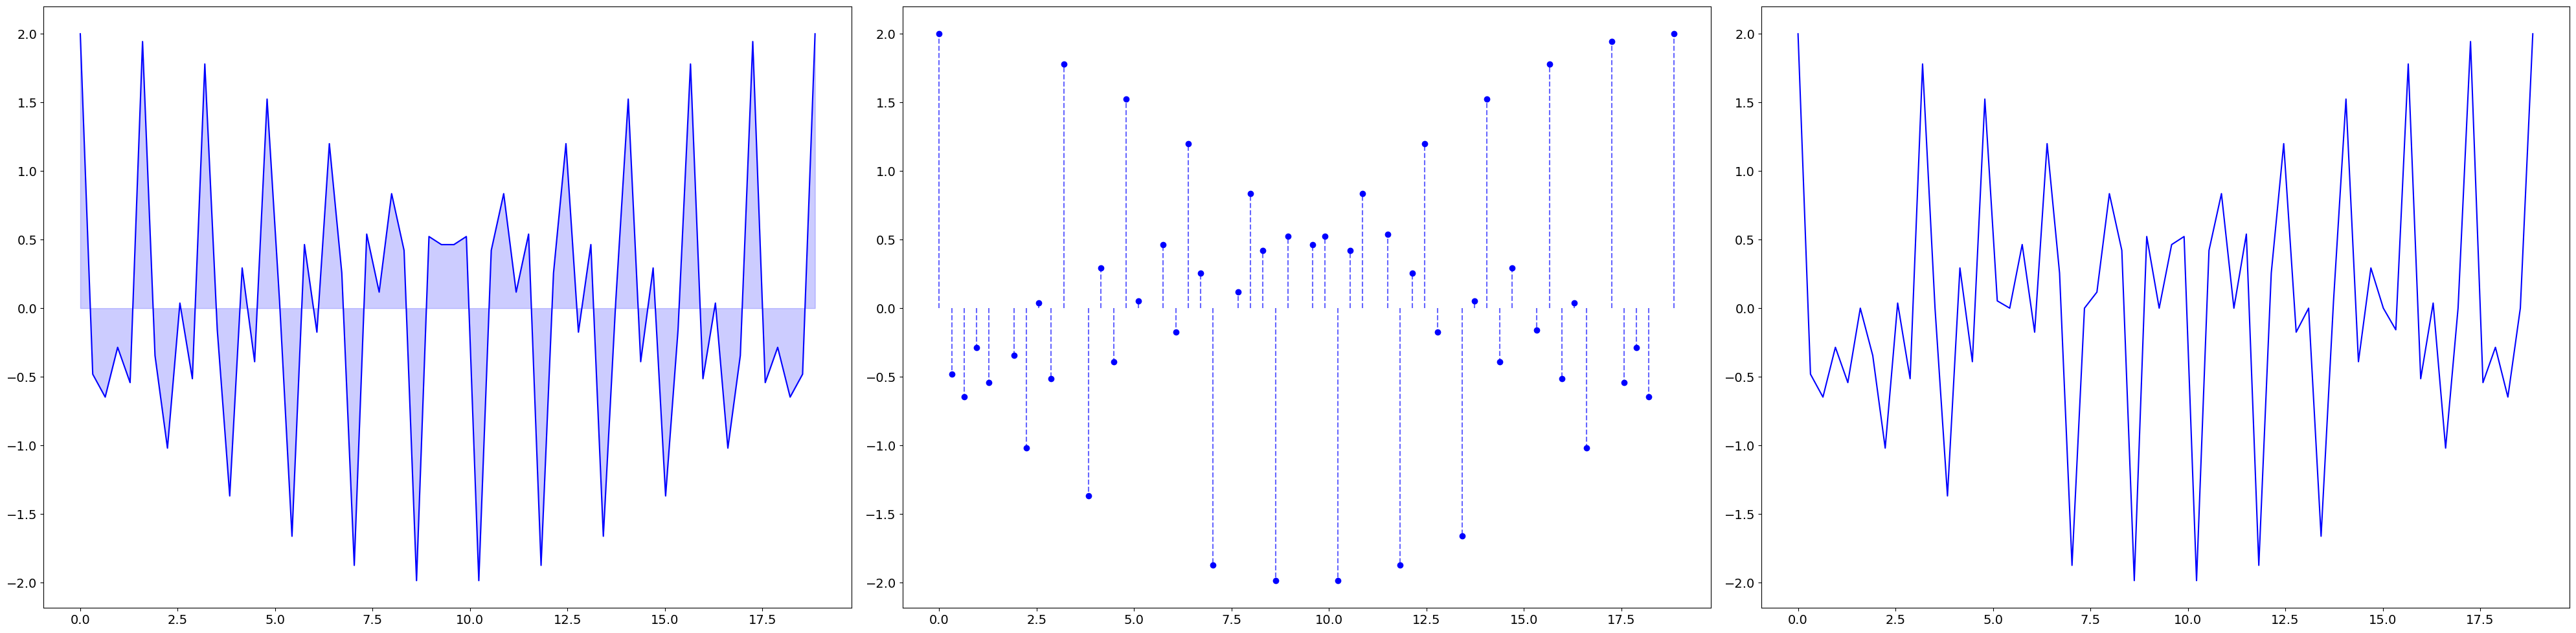

In [177]:
x = np.linspace(0, 6 * np.pi, 60)
y = np.cos(4*x) + np.cos(12 * x)

scatter_idx = np.linspace(0, len(x) - 1, 50).astype(np.int32)
x_scatter = x[scatter_idx]
y_scatter = y[scatter_idx]

g = np.zeros_like(x)
g[scatter_idx] = y[scatter_idx]

fig, axes = plt.subplots(1, 3, figsize=(40, 10), dpi=100)

axes[0].plot(x, y, color="blue")
axes[0].fill_between(x, y, color="blue", alpha=0.2)
axes[0].grid(False)

axes[1].scatter(x_scatter, y_scatter, color="blue", zorder=5)
axes[1].vlines(x_scatter, 0, y_scatter, color="blue", linestyle="--", alpha=0.6)
axes[1].grid(False)

axes[2].plot(x, g, color="blue")
axes[2].grid(False)

plt.tight_layout()
plt.show()

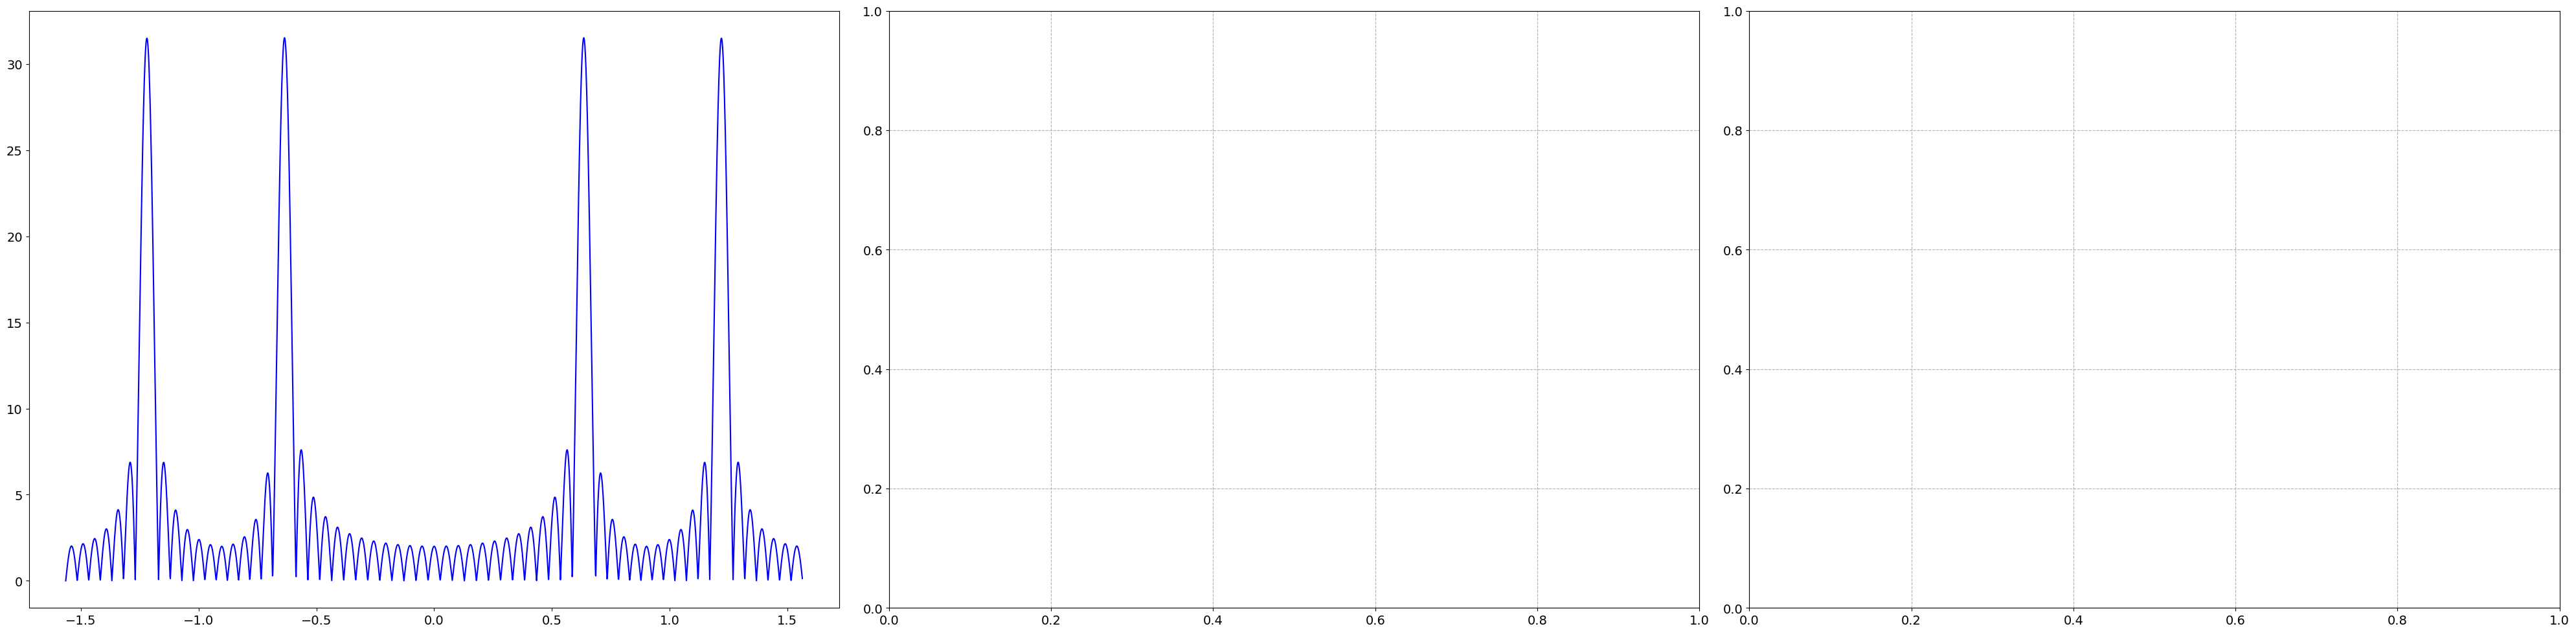

In [178]:
Y = np.fft.fft(y, n=3000)
mag = np.roll(np.abs(Y),-len(Y)//2)
freq = np.roll(np.fft.fftfreq(len(Y), d=(x[1] - x[0])),-len(Y)//2)
# mask = (-1 < freq) & (freq < 1)
# freq = freq[mask]
# mag = mag[mask]
fig, axes = plt.subplots(1, 3, figsize=(40, 10), dpi=100)

axes[0].plot(freq, mag, color="blue")
axes[0].grid(False)

plt.tight_layout()
plt.show()

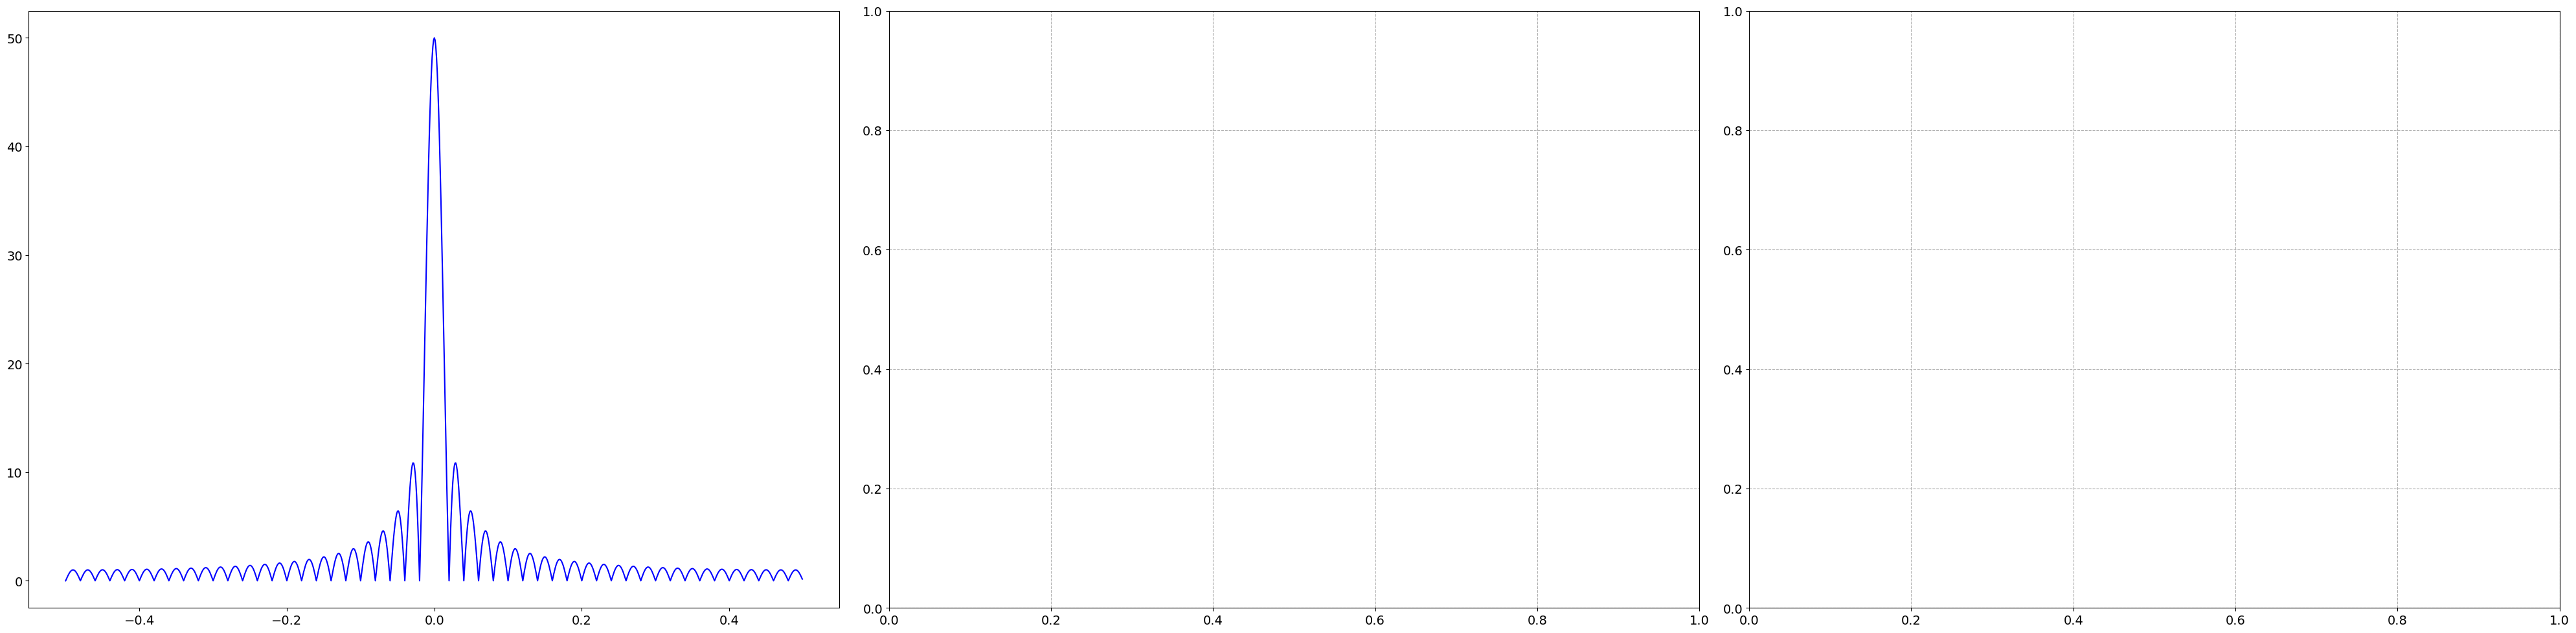

In [158]:
rect=np.ones((100))
rect[len(rect)//2:]=0
Y = np.fft.fft(rect, n=1000)
mag = np.roll(np.abs(Y),-len(Y)//2)
freq = np.roll(np.fft.fftfreq(len(Y), d=1),-len(Y)//2)
# mask = (-1 < freq) & (freq < 1)
# freq = freq[mask]
# mag = mag[mask]
fig, axes = plt.subplots(1, 3, figsize=(40, 10), dpi=100)

axes[0].plot(freq, mag, color="blue")
axes[0].grid(False)

plt.tight_layout()
plt.show()